# Real Estate Valuation Data Set

This research aimed at predicting housing prices within New Taipei City, Taiwan.
Data downloaded from: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set
(https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## Section Order
- Exploratory Data Analysis (Data understanding) Normalization (Data preparation)
- Train-Test Split (Validation)
- Linear Regression (Algorithm)
- R2 (Evaluation)


### Exploratory Data Analysis (Data understanding)


In [1]:
# Load up the packages and data
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
# Loading the data 
housingdata = pd.read_excel('Real estate valuation data set.xlsx')

# Example on how to run data from URL link
# housingdata = pd.read_excel('https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set')

# Examning a few top rows
housingdata

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
# Summary statistics
housingdata.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


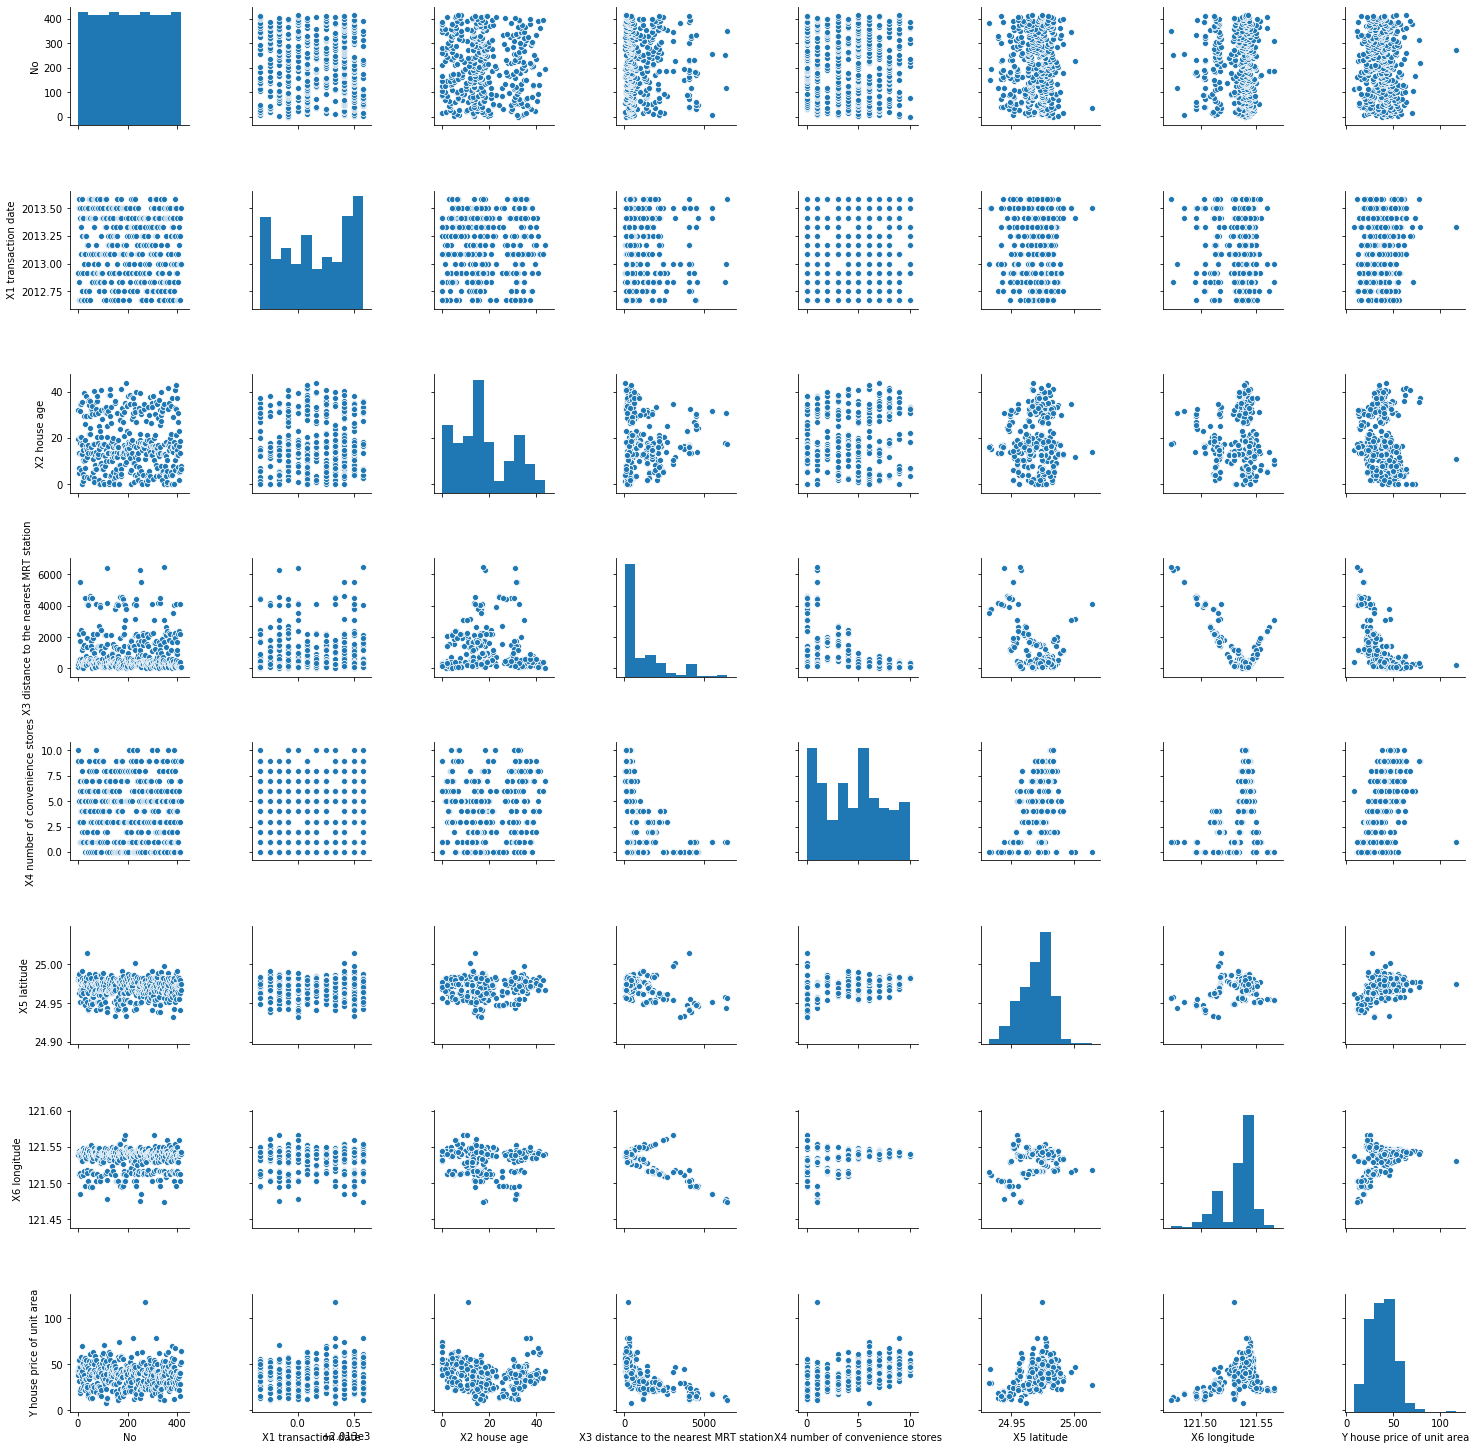

In [4]:
# Getting an idea of the patterns of the data
sns.pairplot(housingdata)

### Normalization (Data preparation)

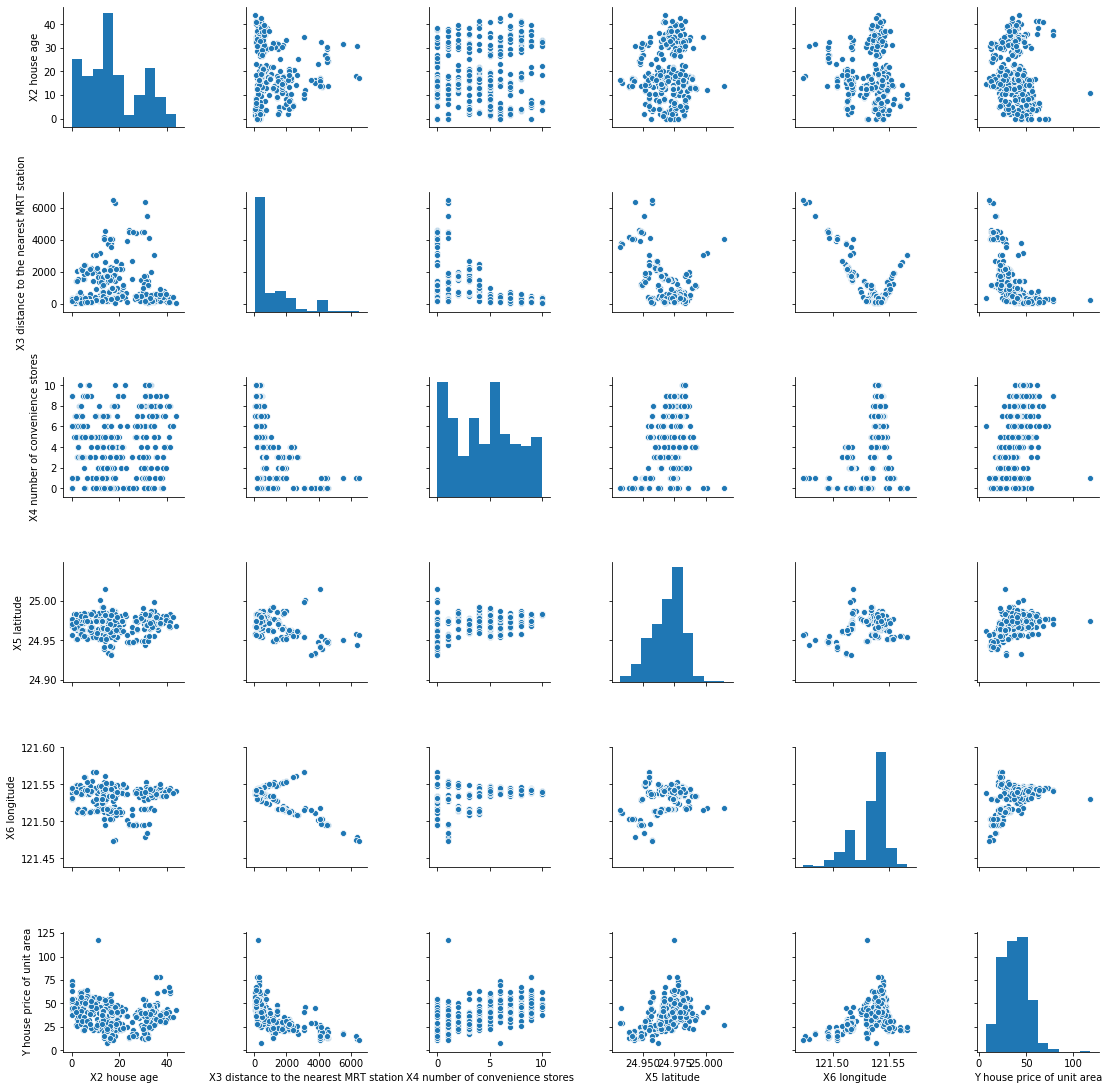

In [5]:
# Correlation plots
## Feature selescting out transaction date
## Since we are not taking time into account

sns.pairplot(housingdata.iloc[:,2:])

In [6]:
# Summary of statistics on numeric columns (removing No column - only an ID )
# Also removing transaction date

housingdata.iloc[:,2:].describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
# Getting non-null values from dataset
housingdata.iloc[:,2:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [8]:
# normalizing data
from sklearn import preprocessing

housingdata_norm = preprocessing.normalize(housingdata.iloc[:,2:])
housingdata_norm = pd.DataFrame(housingdata_norm)

# Code to place header in normalized dataset
housingdata_norm.columns = housingdata.iloc[:,2:].columns

# We do not need to normalize our output/target variable
housingdata_norm['Y house price of unit area'] = housingdata['Y house price of unit area']

housingdata_norm

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.201737,0.535100,0.063043,0.157500,0.766225,37.9
1,0.058362,0.917610,0.026936,0.074764,0.363757,42.2
2,0.023025,0.972905,0.008656,0.043258,0.210416,47.3
3,0.022999,0.971790,0.008646,0.043209,0.210175,54.8
4,0.012132,0.947692,0.012132,0.060611,0.294916,43.1
...,...,...,...,...,...,...
409,0.003355,0.999526,0.000000,0.006107,0.029752,15.4
410,0.034603,0.558934,0.055612,0.154318,0.751023,50.0
411,0.045556,0.947394,0.016962,0.060529,0.294514,40.6
412,0.047379,0.613066,0.029247,0.146038,0.710928,52.5


NB: It is also common to use logarithm instead of normalization when doing money values

In [9]:
# splitting x (train set) and y (test set).

x = housingdata_norm.iloc[:,:5]
x

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.201737,0.535100,0.063043,0.157500,0.766225
1,0.058362,0.917610,0.026936,0.074764,0.363757
2,0.023025,0.972905,0.008656,0.043258,0.210416
3,0.022999,0.971790,0.008646,0.043209,0.210175
4,0.012132,0.947692,0.012132,0.060611,0.294916
...,...,...,...,...,...
409,0.003355,0.999526,0.000000,0.006107,0.029752
410,0.034603,0.558934,0.055612,0.154318,0.751023
411,0.045556,0.947394,0.016962,0.060529,0.294514
412,0.047379,0.613066,0.029247,0.146038,0.710928


In [10]:
y = housingdata_norm.iloc[:,5:6]
y

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


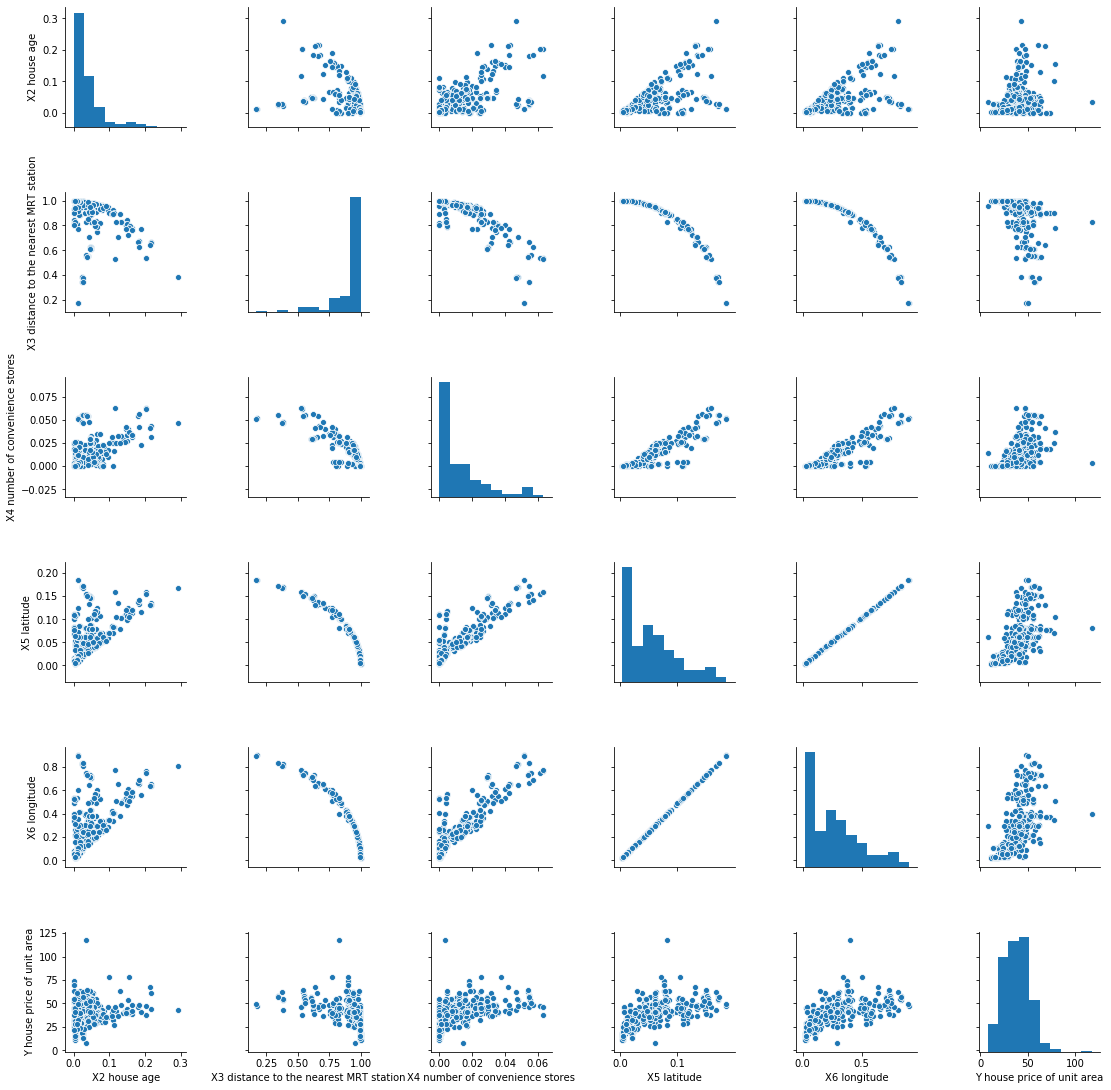

In [11]:
# correlation plot of normalized data:
sns.pairplot(housingdata_norm)

In [12]:
# correlations in a table form
housingdata_norm.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,-0.421179,0.556401,0.537865,0.537767,0.277851
X3 distance to the nearest MRT station,-0.421179,1.000000,-0.858782,-0.908956,-0.909024,-0.509469
X4 number of convenience stores,0.556401,-0.858782,1.000000,0.877750,0.877721,0.579531
X5 latitude,0.537865,-0.908956,0.877750,1.000000,1.000000,0.662669
X6 longitude,0.537767,-0.909024,0.877721,1.000000,1.000000,0.662566
Y house price of unit area,0.277851,-0.509469,0.579531,0.662669,0.662566,1.000000


### Train-Test Split (Validation)


In [13]:
# A common train-test split is 20% of the data for the test set, which is also known as 80/20 train test split

from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 55)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 5)
(83, 5)
(331, 1)
(83, 1)


### Linear Regression (Algorithm)

In [14]:
# Set up the linear regression model

from sklearn import linear_model
lm = linear_model.LinearRegression(fit_intercept=True)

# Trains the linear regression algorithm on the training dataset
model = lm.fit(x_train, y_train)

The linear regression model boils down to the formula y = mx+b. The slope(m) are the coefficient values, while the intercept (b) explains where the line would start if the slopes were 0.

In [15]:
# Intercept value
model.intercept_

array([-34.91939464])

In [16]:
# Coefficient values

coeff_df = pd.DataFrame(model.coef_.T, x.columns, columns=['Coefficient']) 
coeff_df

,Coefficient
X2 house age,-86.382891
X3 distance to the nearest MRT station,58.368546
X4 number of convenience stores,200.712176
X5 latitude,104529.407984
X6 longitude,-21403.405846


In [17]:
# Display more data on linear regression

from statsmodels import regression
import statsmodels.api as sm
import numpy as np

def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:,1]
    return model.summary()

linreg(x_train.values, y_train.values)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     74.73
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           6.07e-52
Time:                        14:41:33   Log-Likelihood:                -1212.0
No. Observations:                 331   AIC:                             2436.
Df Residuals:                     325   BIC:                             2459.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.9194     10.999     -3.175      0.002     -56.558     -13.280
x1           -86.3829     15.386     -5.614      0.000    -116.652     -56.113
x2            58.3685     10.411      5.606      0.000      37.887      78.850
x3           200.7122     82.604      2.430      0.016      38.207     363.218
x4          1.045e+05   2.62e+04      3.993      0.000     5.3e+04    1.56e+05
x5          -2.14e+04   5379.895     -3.978      0.000    -3.2e+04   -1.08e+04
==============================================================================
Omnibus:                      186.472   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2673.807
Skew:                           1.999   Prob(JB):                         0.00
Kurtosis:                      16.338   Cond. No.                     7.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Make predictions of train and test set

pred = lm.predict(x_train)
predd = lm.predict(x_test)

### R2 (Evaluation)


In [19]:
# checking accuracy using r2:

from sklearn.metrics import r2_score

# Training r2
train_r2_score = r2_score(y_train, pred)
print('Training coefficient of determination:', train_r2_score)

Training coefficient of determination: 0.5348106470660423


In [20]:
# Test r3
test_r2_score = r2_score(y_test, predd)
print('Test coefficient of determination:', test_r2_score)

Test coefficient of determination: 0.5488671559665322


In [21]:
# Examining actual values against the predictions of test set

compare = y_test.copy()
compare['predictions'] = predd
compare.head(10)

,Y house price of unit area,predictions
293,42.5,41.657872
84,43.7,41.085185
184,21.8,25.470754
85,50.8,47.571174
231,14.7,24.701607
151,44.7,47.968147
404,41.2,48.068743
67,56.8,50.727744
145,45.5,42.340210
195,34.6,35.410380


In [22]:
from sklearn import metrics

# Training set
print('Train Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train,pred)
)
print('Train Mean Squared Error (MSE):', metrics.mean_squared_error(y_train,pred)
)

# Test set
print('Test Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predd))
print('Test Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predd))



Train Mean Absolute Error (MAE): 6.3159690437486935
Train Mean Squared Error (MSE): 88.7179584725852
Test Mean Absolute Error (MAE): 5.9614377434616745
Test Mean Squared Error (MSE): 69.61245394528785


### Model Improvement

P>|t| ---> p-value test statistic is significantly high in X3. It is 0.016 as compared to 0 and 0.002 in other variables.
Also, looking at the sns plot, the feature x3 is a curve instead of a straight line. That means x3 is a nonlinear feature which messed up the linear regression model. 
Looking at MAE and MSE, very high MSE indicates that there is an outlier that is not helping the regression model.

Model Improvement 1: 
Remove x3 

Model Improvement 2:
Do more in feature engineering to optimize the data display.
Convert the latitude and longitude values into a more relevant format
Remove outliers

Model Improvement 3:
Use a different algorithm to increase the model complexity.
Gradient Boosting 

Model Improvement 4:
Add more data"



#### Model Improvement 1 -  Better feature selection



In [24]:
housingdata=pd.read_excel("Real estate valuation data set.xlsx")

# Removing x3 variable
housingdata=housingdata.drop(housingdata.columns[3], axis=1) 

housingdata_norm=preprocessing.normalize(housingdata.iloc[:,2:]) 
housingdata_norm=pd.DataFrame(housingdata_norm)

#code to place the header columns in the normalized dataset
housingdata_norm.columns=housingdata.iloc[:,2:].columns

#we do not need to normalize out output/target variable
housingdata_norm['Y house price of unit area'] = housingdata['Y house price of unit area']

#data split
x=housingdata_norm.iloc[:,:4]
y=housingdata_norm.iloc[:,4:5]
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size =0.2,random_state=55)

#Trains the linear regression algorithm on the training dataset
lm=linear_model.LinearRegression() 
model=lm.fit(x_train,y_train)

#Make predictions of train and test set
pred=lm.predict(x_train) 
predd=lm.predict(x_test)

#Training r2
train_r2_score = r2_score(y_train,pred)
print('Training coefficient of determination:', train_r2_score)

#Test r2
test_r2_score = r2_score(y_test,predd)
print('Test coefficient of determination:', test_r2_score)

#Training set
print('Train Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, pred))
print('Train Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, pred))

#Test set
print('Test Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predd))
print('Test Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predd))


Training coefficient of determination: 0.9721139488268005
Test coefficient of determination: 0.9712254065634653
Train Mean Absolute Error (MAE): 1.7631625597348413
Train Mean Squared Error (MSE): 5.318250545384964
Test Mean Absolute Error (MAE): 1.7485062306065566
Test Mean Squared Error (MSE): 4.440089181905255


After taking out x3, we have very high coefficient of determination for both test and train data. 
MAE and MSE metrics are now much lower too. This shows that we have a very good regression model.